## Lab 8: Image Signal Processing
### Otsu's Thresholding

**Ayush Mukund Jamdar EE20B018**

Through this experiment, we aim to implement a global thresholding method on images to obtain a binary image that separates out the foreground and the background. This is a **variance-based** technique. 

In class we had proved that the sum of within-class variance (of image intensities) $\sigma^2_w$ and between-class variance $\sigma^2_b$ is the total variance $\sigma^2_T$. We had also proved that since the total variance is independent of threshold $t$, we can either minimize $\sigma^2_w$ or maximize $\sigma^2_b$ to obtain the optimal threshold. 

In this implementation, we shall minimize $\sigma^2_w$ to find the best $t$.

Lets start with loading basic functions. 

In [29]:
# Basic Helper Functions

# load modules
import numpy as np
from PIL import Image # for image loading and saving
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Convert a grayscale png/jpg image to a numpy array
# of ints 0 to 255
def image2array(filename, colour=False):
    image = Image.open(filename)

    if colour:
        image = image.convert('L')
        image = image.resize((800, 500))
        # convert to black and white

    return np.array(image)

# Save a 2D numpy array as an image in jpg/png
def saveArrAsImage(image_array, filepath, file_format):
    image = Image.fromarray(image_array)
    # image.show()
    image.save(filepath, file_format)
    return

# Display a 2D numpy array as an image in the notebook
def displayImageArray(image_array):
    image = Image.fromarray(image_array)
    display(image)

Here is the Otsu's Thresholding Algorithm.

Foreground and background pixel intensity variations are calculated. A weighted averaged, for the number of points in those classes is finally, the within-class variance $\sigma^2_w$.

$$\sigma^2_w(t) = w_{bg}(t) \sigma^2_{bg}(t) + w_{fg}(t) \sigma^2_{fg}(t)$$

In [30]:
def find_otsu_threshold(image_mat):
    ''' 
    implementation of the Otsu Algorithm

    inputs: 2D image matrix, grayscale 8-bit int

    output: optimal threshold 
    '''    
    # this is an exhaustive 1D search

    # a dictionary to store variances for all thresholds 
    vars_dict = {}

    # the optimal threshold can be anywhere from 0 to 255
    thresholds = np.arange(256)

    for t in thresholds:
        # find foreground and background pixel indices 
        # for this threshold
        fg_pixels = np.where(image_mat > t)
        bg_pixels = np.where(image_mat <= t)

        # calcuate weights
        w_bg = np.sum(bg_pixels) / image_mat.size
        w_fg = np.sum(fg_pixels) / image_mat.size

        # calculate intra-class variance
        var_fg = np.var(image_mat[fg_pixels])
        var_bg = np.var(image_mat[bg_pixels])

        # calculate within-class variance
        var = w_bg * var_bg + w_fg * var_fg

        # add to dictionary
        vars_dict[t] = var

    # find the least variance 
    # exploit the fact that the keys will be equal to the indices
    # of arrayed values as t goes from 0 to 255
    vars_list = list(vars_dict.values())
    t_min_var = vars_list.index(min(vars_list))

    return t_min_var


In [31]:
def show_thresholded_image(image_mat, threshold):
    thresholded_image = np.zeros_like(image_mat).astype(np.uint8)
    thresholded_image[np.where(image_mat > threshold)] = 255
    displayImageArray(thresholded_image)
    return    

Let's see the images and perform thresholding.

#### Image 1

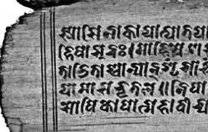

In [32]:
# image 1
image_1 = image2array('palmleaf1.png')
displayImageArray(image_1)

Threshold =  104


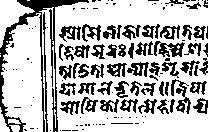

In [33]:
t1 = find_otsu_threshold(image_1)
print("Threshold = ", t1)
show_thresholded_image(image_1, t1)

#### Image 2

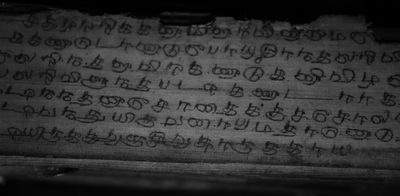

In [34]:
# image 2
image_2 = image2array('palmleaf2.png')
displayImageArray(image_2)

Threshold =  50


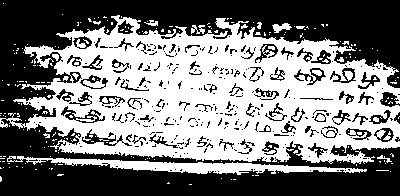

In [35]:
t2 = find_otsu_threshold(image_2)
print("Threshold = ", t2)
show_thresholded_image(image_2, t2)

The thresholded binary images are displayed. We observe that the grayscale images are converted to binary black-and-whites. The algorithm looks successful as can be interpreted by looking at the images to visually separate foreground from the background. 